<div style="text-align: center;">

  <h1 style="background-color:purple; color:white;">Heart Disease Analysis</h1>

</div>


`Problem Statement:`
Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all
irrespective of any status. You are required to analyze this health and medical data for better
future preparation.<br>
Do ETL: Extract- Transform and Load data from the heart disease diagnostic database
You can perform EDA through python. The database extracts various information such as
Heart disease rates, Heart disease by gender, by age.<br>
You can even compare attributes of the data set to extract necessary information. Make the
necessary dashboard with the best you can extract from the data. Use various visualization
and features and make the best dashboard<br>
Find key metrics and factors and show the meaningful relationships between attributes.

`Import libraries and Dataset`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set(color_codes=True)
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/tirum/Downloads/Heart Disease data/Heart Disease data/Heart Disease data.csv")

In [3]:
# get top 5 rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Attribute Information:**

- **age**
- **sex**
- **chest pain type (4 values):**
  - 0: typical angina
  - 1: atypical angina
  - 2: non-anginal pain
  - 3: asymptomatic
- **trestbps:** resting blood pressure (in mm Hg on admission to the hospital)
- **chol:** serum cholesterol in mg/dl
- **fbs:** fasting blood sugar > 120 mg/dl (1 = True, 0 = False)
- **restecg:** resting electrocardiographic results (values 0, 1, 2)
- **thalach:** maximum heart rate achieved
- **exang:** exercise induced angina (1 = yes, 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest
- **slope:** the slope of the peak exercise ST segment
  - 1: unslopping
  - 2: flat
  - 3: downslopping
- **ca:** number of major vessels (0-3) colored by fluoroscopy
- **thal:**
  - 0 = normal
  - 1 = fixed defect
  - 2 = reversible defect
- **target:** 0 = less chance of heart attack, 1 = more chance of heart attack


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
# know no.of rows and columns
df.shape

(1025, 14)

In [6]:
print("Number of rows", df.shape[0])
print("Number of columns",df.shape[1])

Number of rows 1025
Number of columns 14


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Thare is no null values in this dataset

In [9]:
duplicates=df.duplicated().sum()
duplicates

723

In [10]:
df=df.duplicates=df.drop_duplicates()

In [11]:
df.shape

(302, 14)

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


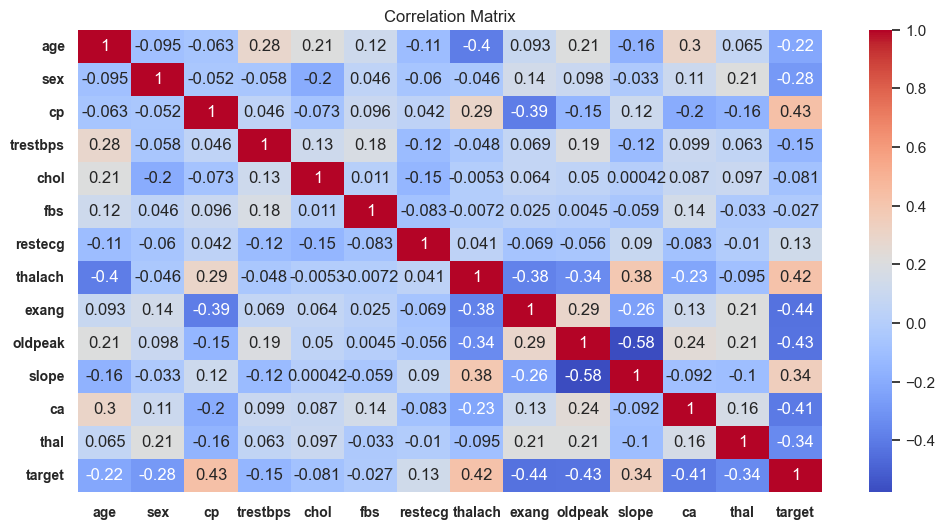

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Matrix")
plt.xticks(fontweight='bold', fontsize=10)
plt.yticks(fontweight='bold', fontsize=10)
plt.show()

 Exploratory Data Analysis (EDA)


In [15]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

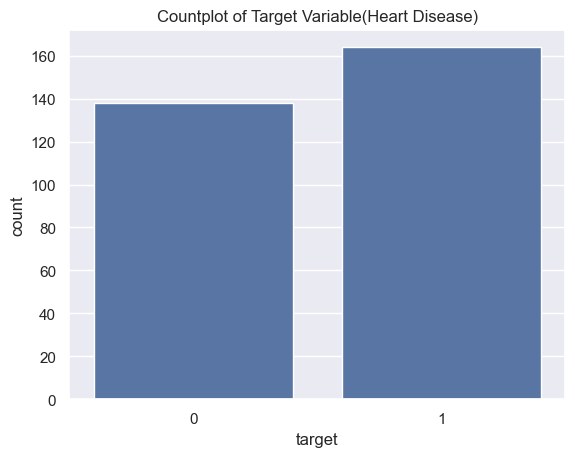

In [16]:
#  Distribution of the target variable 
sns.countplot(x='target', data=df)
plt.title('Countplot of Target Variable(Heart Disease)')
plt.show()

In [17]:
df['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

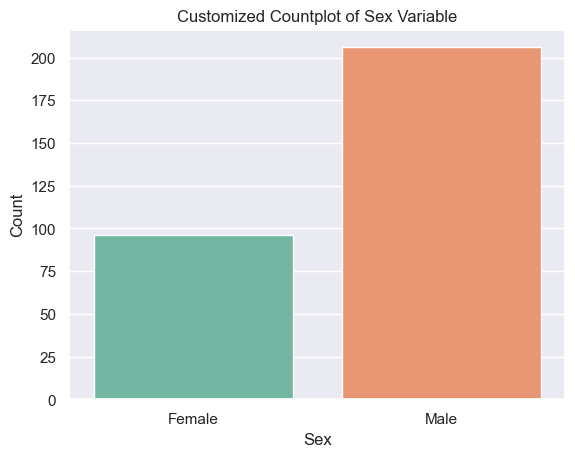

In [18]:
# Distribution of sex variable
sns.countplot(x='sex', data=df, palette='Set2')
plt.title('Customized Countplot of Sex Variable')
plt.xticks([0,1],['Female','Male'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

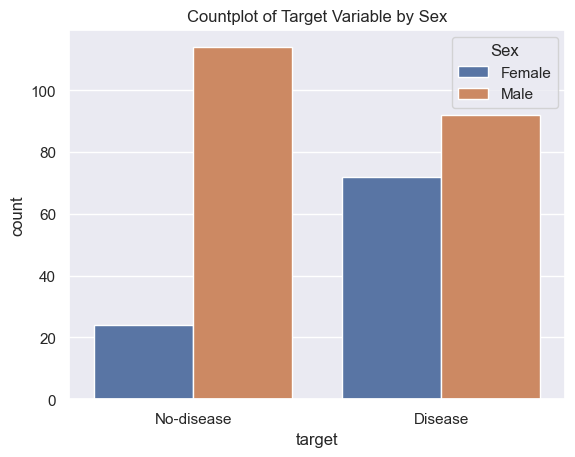

In [19]:
# Heart disease distribution by sex
sns.countplot(x='target', hue='sex', data=df)
plt.title('Countplot of Target Variable by Sex')
plt.xticks([0,1],['No-disease','Disease'])

plt.legend(title='Sex', labels=['Female', 'Male'])

# Show the plot
plt.show()

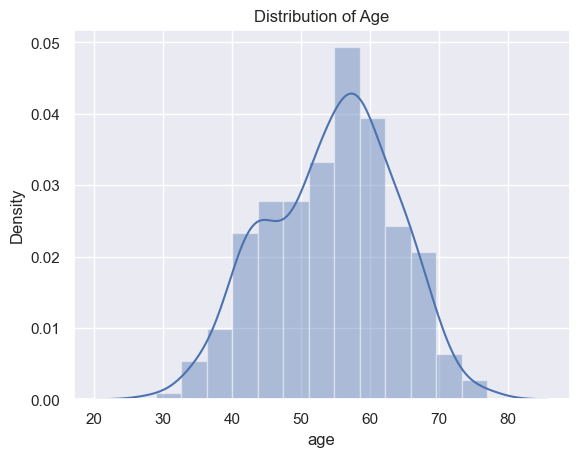

In [20]:
sns.distplot(df['age'])
plt.title("Distribution of Age")
plt.show()

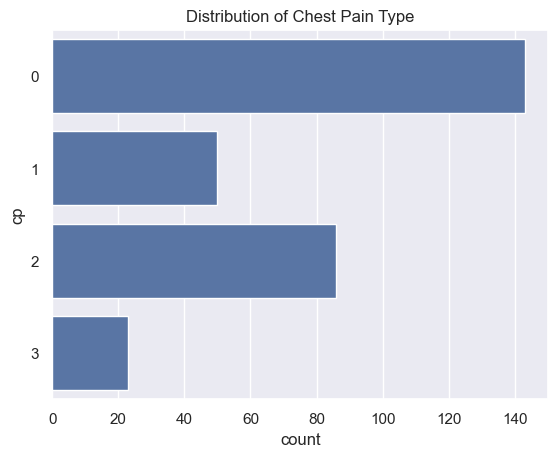

In [21]:
sns.countplot(y='cp', data=df)
plt.title('Distribution of Chest Pain Type')
plt.show()


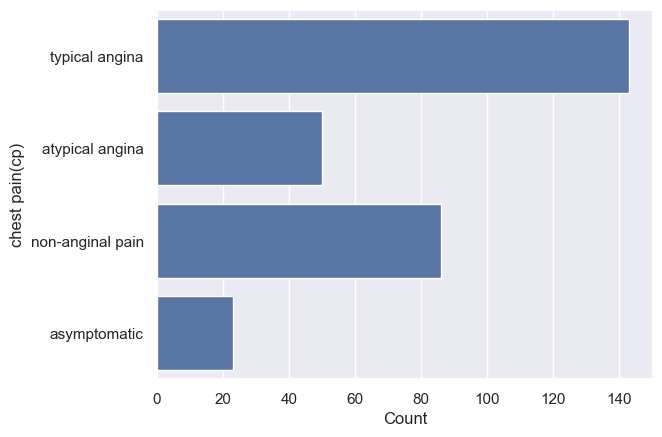

In [22]:
sns.countplot(y='cp', data=df)
plt.yticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xlabel("Count")
plt.ylabel("chest pain(cp)")
plt.show()

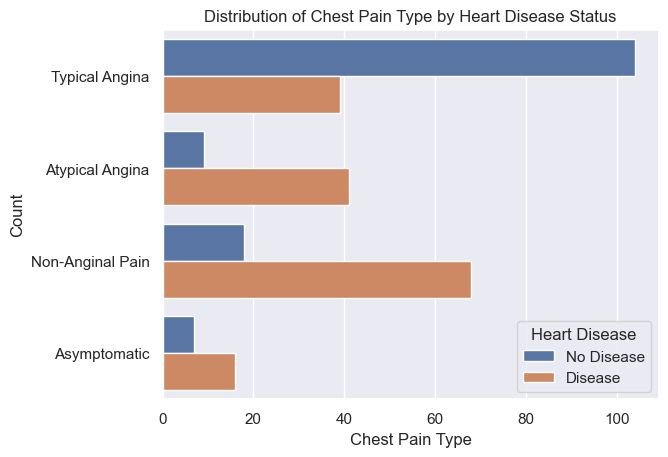

In [23]:
# Chest pain distribution by heart disease status
sns.countplot(y='cp', hue='target', data=df)
plt.title('Distribution of Chest Pain Type by Heart Disease Status')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])

plt.yticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])

plt.show()

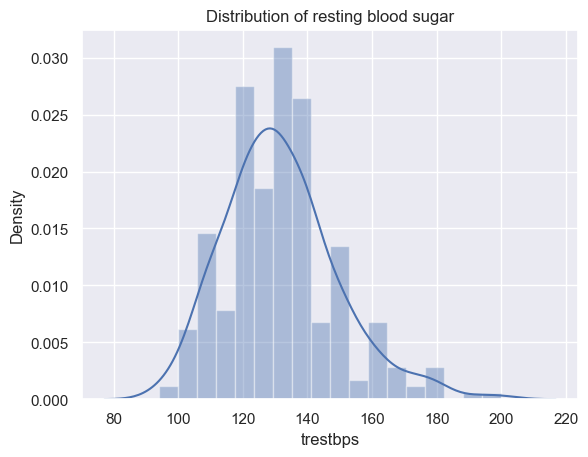

In [24]:
# know resting blood sugar
sns.distplot(df['trestbps'])
plt.title("Distribution of resting blood sugar")
plt.show()

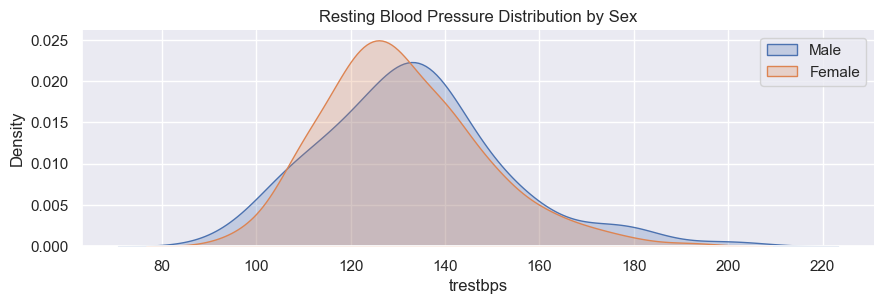

In [25]:
# Resting blood pressure distribution by sex
gender=sns.FacetGrid(df,hue='sex',aspect=3)
gender.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=['Male','Female'])
plt.title("Resting Blood Pressure Distribution by Sex")
plt.show()

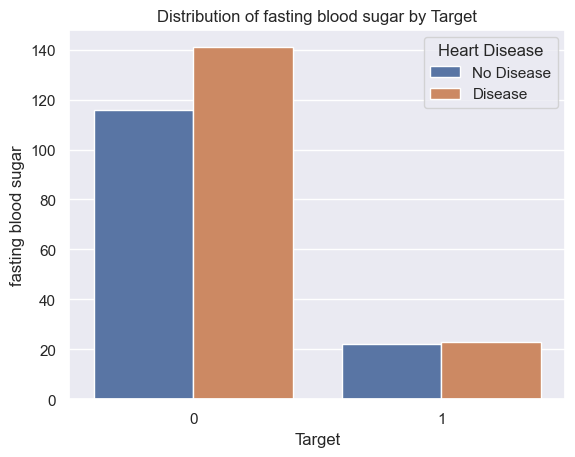

In [26]:
# Fasting blood sugar distribution by heart disease status

sns.countplot(x='fbs', hue='target', data=df)
plt.title('Distribution of fasting blood sugar by Target')
plt.xlabel('Target')
plt.ylabel('fasting blood sugar')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])

plt.show()

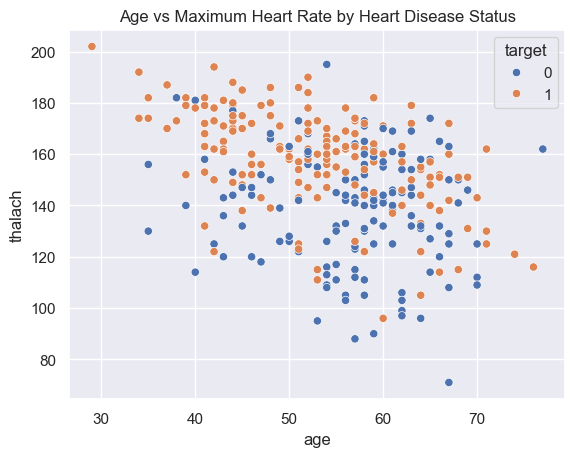

In [27]:
#  Age vs. Maximum Heart Rate by Heart Disease Status
sns.scatterplot(x='age', y='thalach', hue='target', data=df)
plt.title('Age vs Maximum Heart Rate by Heart Disease Status')
plt.show()

<Axes: >

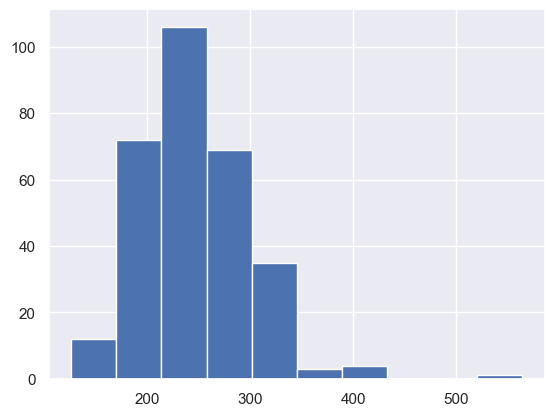

In [28]:
df['chol'].hist()

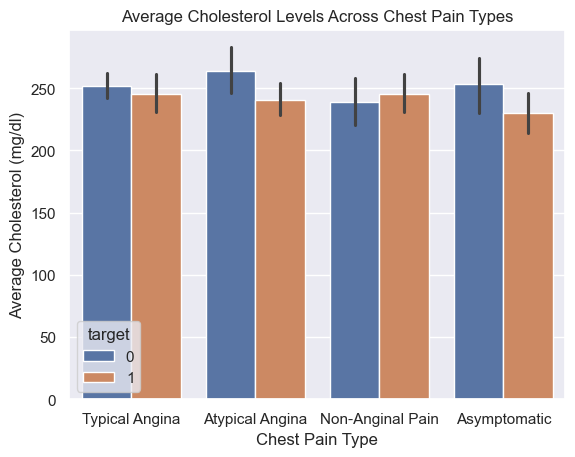

In [29]:
# Cholesterol levels across different chest pain types
sns.barplot(x='cp', y='chol', hue='target', data=df)
plt.title('Average Cholesterol Levels Across Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Average Cholesterol (mg/dl)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.show()

In [30]:
cat_var=[]
con_var=[]
for col in df.columns:
    if df[col].nunique() <=10:
        cat_var.append(col)
    else:
        con_var.append(col)   

In [31]:
con_var

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [32]:
cat_var

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [33]:
print(f"Categorical variables: {cat_var}")
print(f"Continuous variables: {con_var}")

Categorical variables: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous variables: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


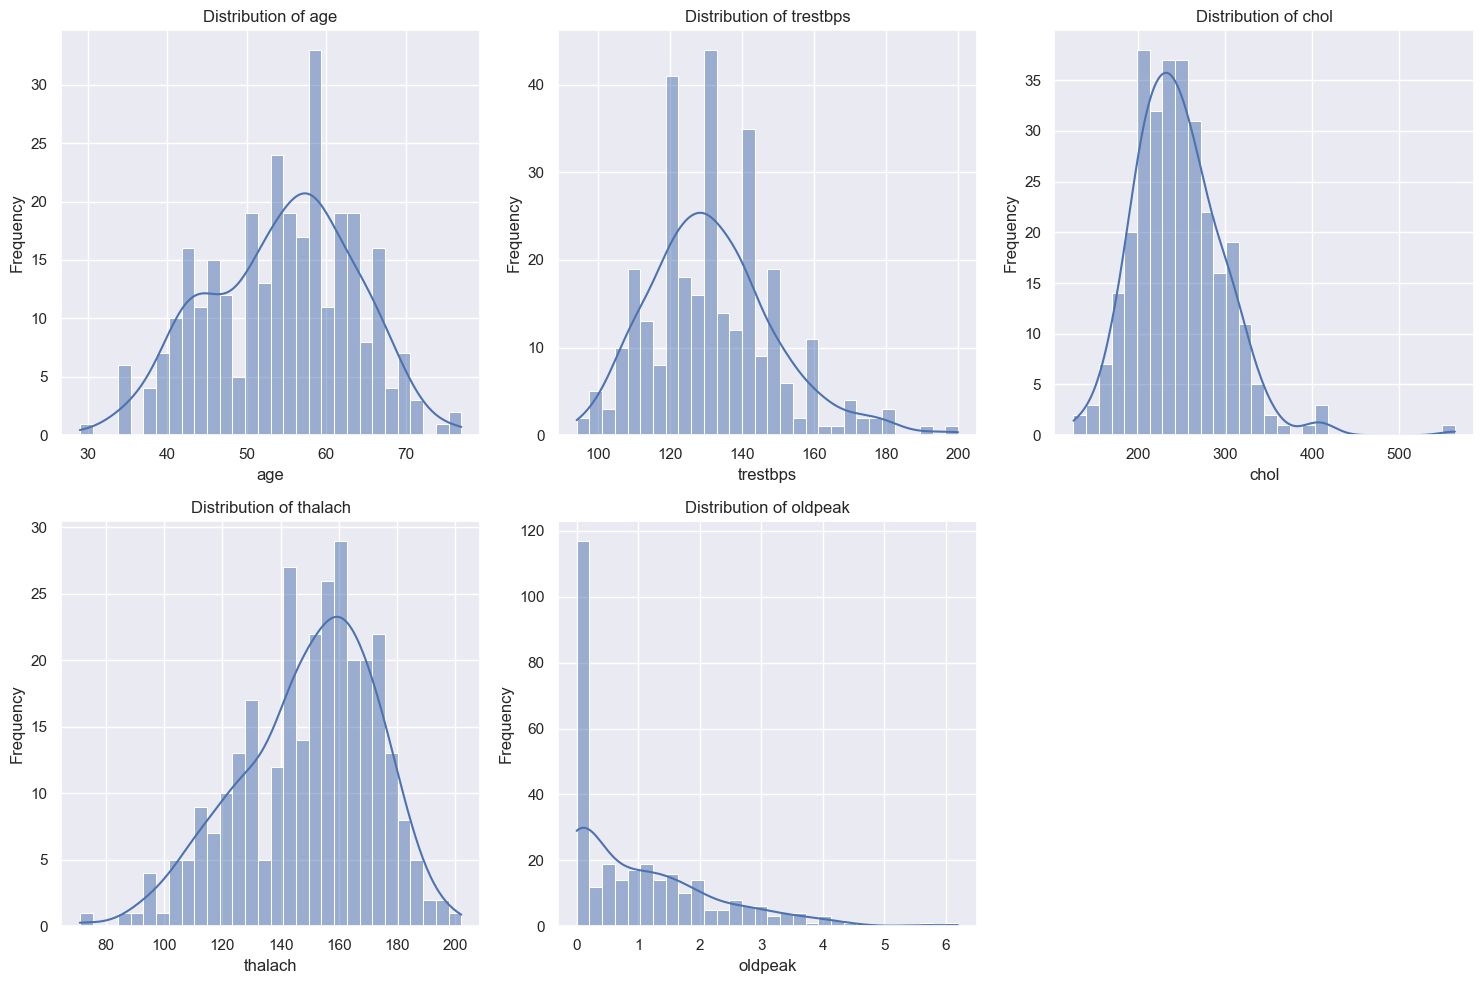

In [34]:
# Distribution of continuous variables
con_var = [col for col in df.columns if df[col].nunique() > 10]

plt.figure(figsize=(15, 10))
for i, var in enumerate(con_var):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


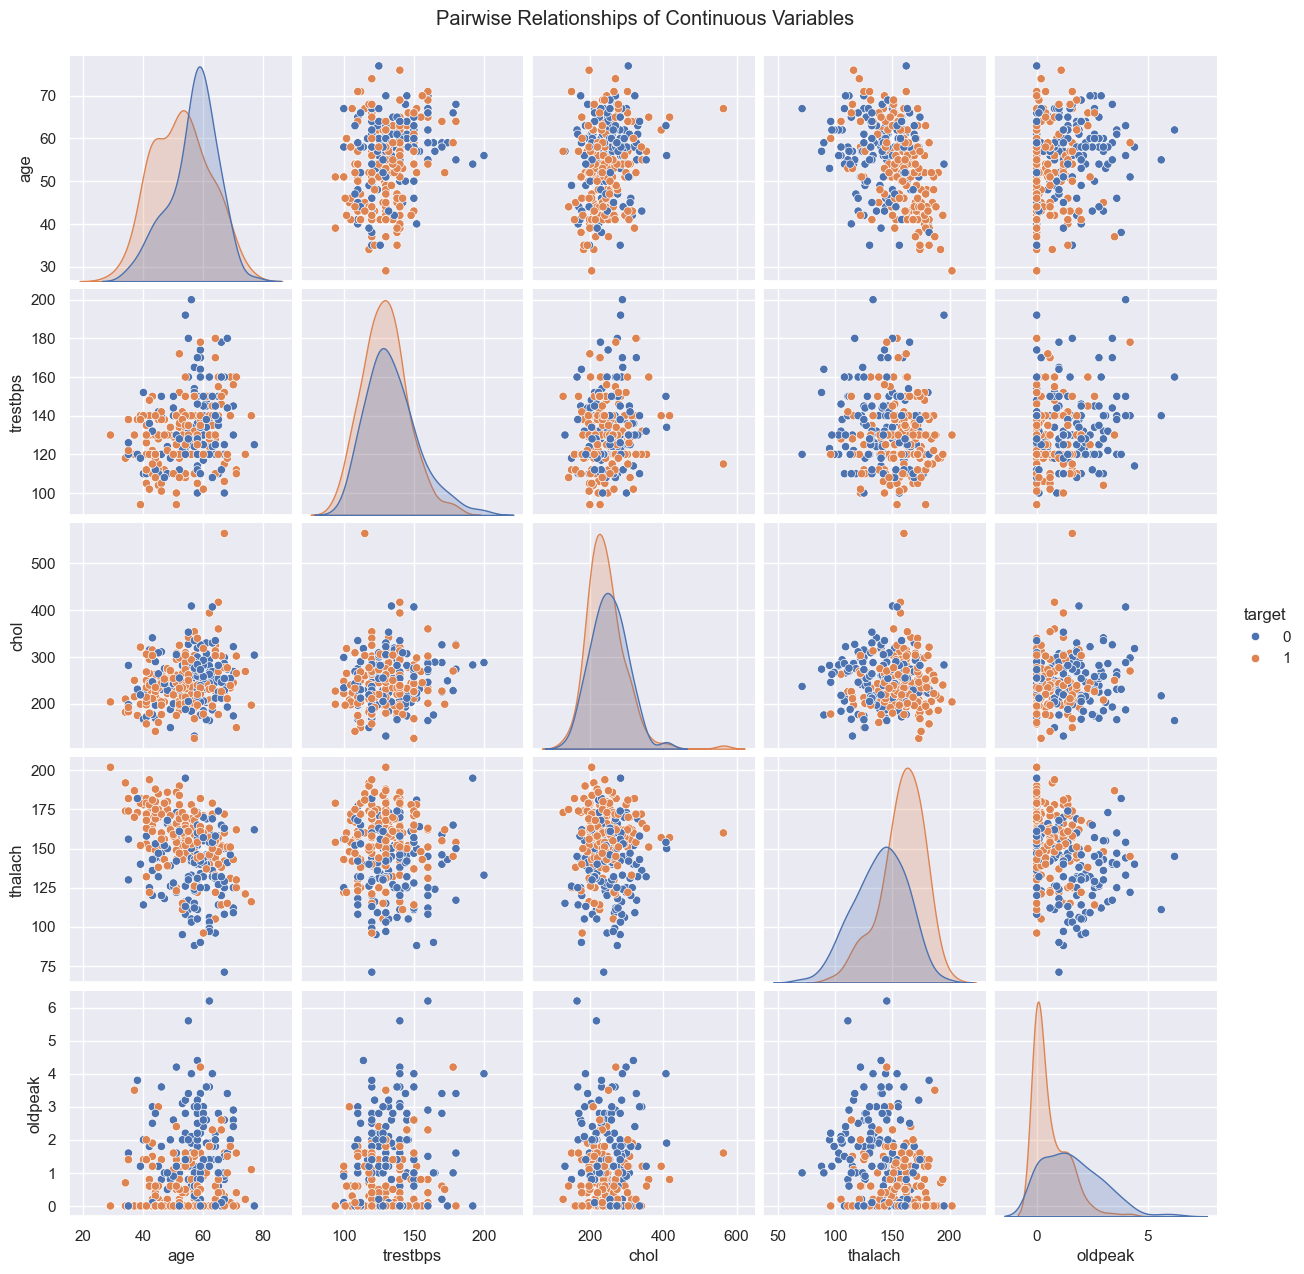

In [35]:

# Pairwise relationships of continuous variables
sns.pairplot(df, vars=con_var, hue='target')
plt.suptitle('Pairwise Relationships of Continuous Variables', y=1.02)
plt.show()

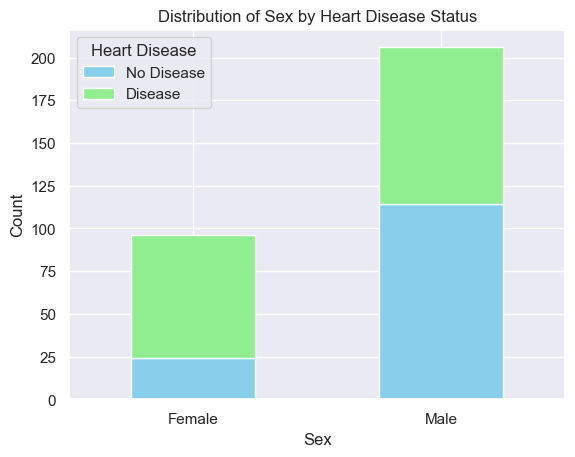

In [36]:
# Distribution of sex by heart disease status
pd.crosstab(df['sex'], df['target']).plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'])
plt.title('Distribution of Sex by Heart Disease Status')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

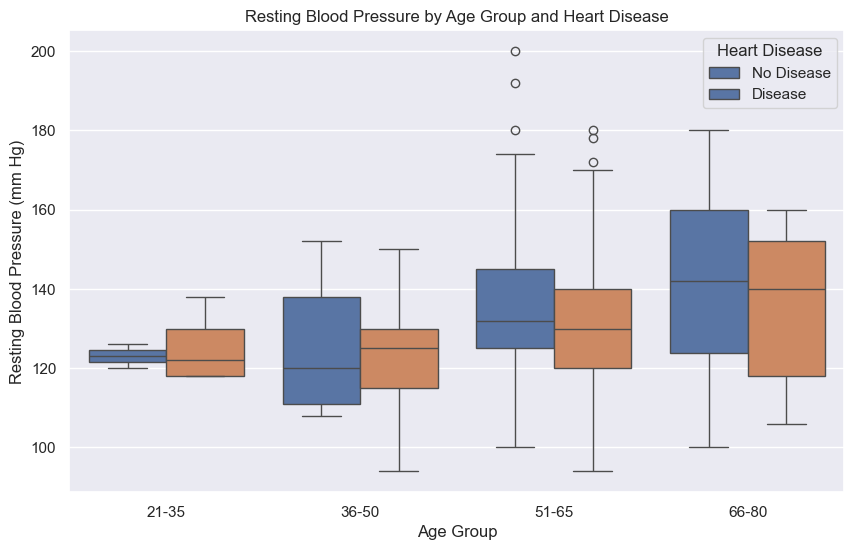

In [37]:
# Create age_group column by binning the 'age' column
df['age_group'] = pd.cut(df['age'], bins=[20, 35, 50, 65, 80], labels=['21-35', '36-50', '51-65', '66-80'])

# Now, create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='trestbps', hue='target', data=df)
plt.title('Resting Blood Pressure by Age Group and Heart Disease')
plt.xlabel('Age Group')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()


In [38]:
# Splitting data into categorical and continuous variables
cat_var = [col for col in df.columns if df[col].nunique() <= 10]
con_var = [col for col in df.columns if df[col].nunique() > 10]

print(f"Categorical variables: {cat_var}")
print(f"Continuous variables: {con_var}")

Categorical variables: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target', 'age_group']
Continuous variables: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,  roc_auc_score, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
import joblib

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [65]:
'''label_encoder = LabelEncoder()
df['age_group_encoded'] = label_encoder.fit_transform(df['age_group'])
'''

"label_encoder = LabelEncoder()\ndf['age_group_encoded'] = label_encoder.fit_transform(df['age_group'])\n"

In [67]:
'''# One-Hot Encoding example (if categories are nominal with no order)
df = pd.get_dummies(df, columns=['age_group'], drop_first=True)
'''

"# One-Hot Encoding example (if categories are nominal with no order)\ndf = pd.get_dummies(df, columns=['age_group'], drop_first=True)\n"

In [68]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group_encoded,age_group_36-50,age_group_51-65,age_group_66-80
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,2,False,True,False
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,2,False,True,False
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,3,False,False,True
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,2,False,True,False
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2,False,True,False


In [69]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target',
       'age_group_encoded', 'age_group_36-50', 'age_group_51-65',
       'age_group_66-80'],
      dtype='object')

In [94]:
# Assigning features (X) and target (y)
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]

y = df['target']  # Target column


In [95]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [96]:
# Preprocessing pipeline: Scaling continuous variables and One-Hot Encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), X_train.select_dtypes(include=['bool']).columns)
    ])


In [97]:
# Building the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [98]:
# Training the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [99]:

# Predictions
y_pred = model.predict(X_test)


In [100]:
# Model Evaluation
print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}")
print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")



Accuracy: 0.8360655737704918

Confusion Matrix:
[[25  7]
 [ 3 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61




ROC-AUC Score: 0.878771551724138


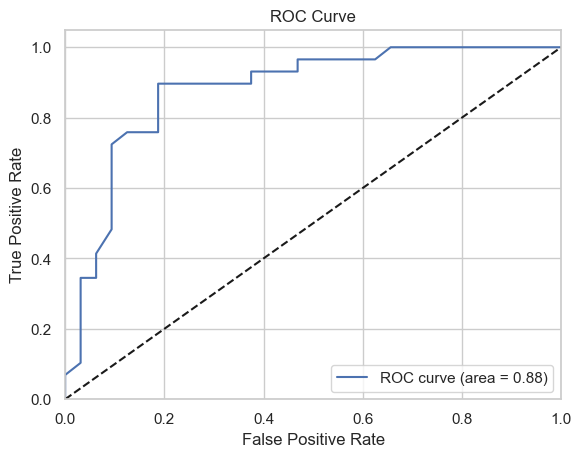

In [101]:

# ROC-AUC Score and Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nROC-AUC Score: {roc_auc}")

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


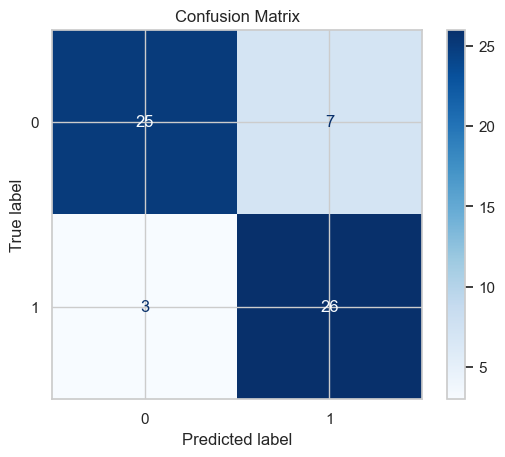

In [102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

